# Problem 1

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline


from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans

from sklearn import preprocessing
from sklearn import metrics

In [49]:
import pandas as pd
filename = "auto-mpg.data"
column_names = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'year', 'origin', 'name']
df = pd.read_csv(filename, delim_whitespace=True, names=column_names)

print (df.shape)
df.head(5)

(398, 9)


,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


In [50]:
horsepower_missing_ind = df[df.horsepower=='?'].index
df.loc[horsepower_missing_ind]

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
32,25.0,4,98.0,?,2046.0,19.0,71,1,ford pinto
126,21.0,6,200.0,?,2875.0,17.0,74,1,ford maverick


In [53]:
df.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight          float64
acceleration    float64
year              int64
origin            int64
name             object
dtype: object

We need only the continuous values, so we need MPG, displacement, horsepower, weight, and acceleration

In [54]:
df.loc[horsepower_missing_ind, 'horsepower'] = float('nan')
df.horsepower = df.horsepower.apply(pd.to_numeric)
df.loc[horsepower_missing_ind, 'horsepower'] = int( df.horsepower.mean() )

In [64]:
df.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'year', 'origin', 'name'],
      dtype='object')

In [66]:
dfNew = df[['mpg','displacement','horsepower','weight','acceleration']]

In [67]:
dfNew

,mpg,displacement,horsepower,weight,acceleration
0,18.0,307.0,130.0,3504.0,12.0
1,15.0,350.0,165.0,3693.0,11.5
2,18.0,318.0,150.0,3436.0,11.0
3,16.0,304.0,150.0,3433.0,12.0
4,17.0,302.0,140.0,3449.0,10.5
...,...,...,...,...,...
393,27.0,140.0,86.0,2790.0,15.6
394,44.0,97.0,52.0,2130.0,24.6
395,32.0,135.0,84.0,2295.0,11.6
396,28.0,120.0,79.0,2625.0,18.6


In [68]:
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering

In [69]:
scaler = StandardScaler()

In [70]:
df_std = scaler.fit_transform(dfNew)

In [71]:
clt = AgglomerativeClustering(linkage='average', 
                              affinity='euclidean', 
                              n_clusters=3)

In [73]:
model = clt.fit(df_std)

In [74]:
model.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 2, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,

In [75]:
model

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='average', memory=None, n_clusters=3,
                        pooling_func='deprecated')

In [76]:
print(model)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='average', memory=None, n_clusters=3,
                        pooling_func='deprecated')


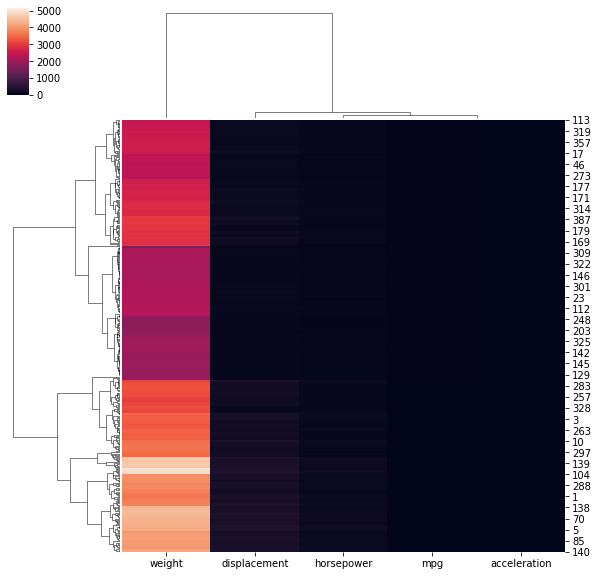

In [78]:
sns.clustermap(dfNew,
               method='average',
               metric='euclidean',
               z_score=None,
               standard_scale=None);

# Problem 2

In [79]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline


from sklearn.datasets import load_boston
from sklearn.cluster import KMeans

from sklearn import preprocessing
from sklearn import metrics

In [80]:
dataset = load_boston()
df = pd.DataFrame(data=dataset.data,
                  columns=dataset.feature_names)
df_scaled = pd.DataFrame(data=preprocessing.scale(dataset.data),
                         columns=dataset.feature_names)

In [106]:
clust_model = KMeans(n_clusters=2,
                     init='k-means++')
clust_labels = clust_model.fit_predict(df_scaled)
print(clust_labels)
print(np.mean(clust_labels))

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 1 0 1 1 1 1 1 0 1 0 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 

In [90]:
silhouette_avg = metrics.silhouette_score(df_scaled,
                                          clust_labels)

print(silhouette_avg)

0.3057123243563224


In [105]:
clust_model = KMeans(n_clusters=3,
                     init='k-means++')
clust_labels = clust_model.fit_predict(df_scaled)
print(clust_labels)
print(np.mean(clust_labels))

[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 0 0 0 0 0 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 2 2 0 0 0 0 0 0 2 0 2 2 2 2
 2 2 2 2 2 2 0 2 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 2 2 0 2 0 0 0 0 0 0 0 0 0 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2
 2 2 0 0 0 0 0 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0
 2 2 2 2 2 2 2 2 0 2 0 0 2 2 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 

In [93]:
silhouette_avg = metrics.silhouette_score(df_scaled,
                                          clust_labels)

print(silhouette_avg)

0.2625819378236339


In [102]:
clust_model = KMeans(n_clusters=4,
                     init='k-means++')
clust_labels = clust_model.fit_predict(df_scaled)
print(clust_labels)
print(np.mean(clust_labels))

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 0 0 0 0 0 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 1 1 1 1
 1 1 1 1 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 1 1 1 1 2 1 2 1 2 2 2 2 3 2 2 2 2 2
 2 2 2 2 3 2 3 3 2 1 1 1 3 1 3 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 3 3 3 3 3 1 1 1 3 1 3 3 3 3
 3 1 1 1 1 1 1 1 1 1 1 1 3 1 3 1 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 1 1
 1 1 1 1 1 1 1 1 1 1 3 1 0 1 3 3 0 3 3 0 0 0 0 3 0 0 0 0 0 0 0 0 0 0 1 1 1
 1 1 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0
 1 1 1 1 1 1 1 1 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 3 3 3 2 2 2 2 3 3 2 2 2 2 3
 3 2 3 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 

In [95]:
silhouette_avg = metrics.silhouette_score(df_scaled,
                                          clust_labels)

print(silhouette_avg)

0.2809804562187518


In [103]:
clust_model = KMeans(n_clusters=5,
                     init='k-means++')
clust_labels = clust_model.fit_predict(df_scaled)
print(clust_labels)
print(np.mean(clust_labels))

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1 1 1 1 1 1 1
 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 4 2 2 2 2 2
 2 2 2 2 4 2 4 4 3 1 1 2 4 1 4 4 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 4 4 4 4 4 1 1 1 4 1 4 4 4 4
 4 1 1 1 1 1 1 1 1 1 1 1 4 1 4 1 0 0 0 1 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 1 1
 1 1 1 1 1 1 1 1 1 1 4 1 1 1 4 4 0 4 4 0 0 0 0 4 0 0 0 0 0 0 0 0 0 0 1 1 1
 1 1 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0
 1 1 1 1 1 1 1 1 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 4 4 4 2 2 2 2 4 4 2 2 3 2 4
 4 2 4 2 2 2 2 2 2 2 3 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 2
 2 2 3 3 3 3 3 3 3 3 3 3 3 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 2 2 2 2 2
 2 3 2 2 2 2 3 2 2 2 3 3 3 3 2 2 2 2 2 2 2 2 3 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 

In [97]:
silhouette_avg = metrics.silhouette_score(df_scaled,
                                          clust_labels)

print(silhouette_avg)

0.2878157430985236


In [104]:
clust_model = KMeans(n_clusters=6,
                     init='k-means++')
clust_labels = clust_model.fit_predict(df_scaled)
print(clust_labels)
print(np.mean(clust_labels))

[5 5 5 5 5 5 5 5 1 5 5 5 5 5 1 5 5 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 5 5
 5 5 0 0 5 5 5 5 5 5 5 1 5 5 5 5 5 0 0 0 0 5 5 5 5 5 5 5 0 0 5 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 1 5 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 4 1 1 1 1 1
 1 1 1 1 4 1 4 4 2 1 1 1 4 5 4 4 1 1 5 1 1 1 1 1 1 5 5 5 5 5 5 5 5 5 5 5 5
 5 5 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 5 5 1 4 4 4 4 4 5 1 5 4 5 4 4 4 4
 4 5 5 5 5 5 5 5 5 5 5 5 4 5 4 5 0 5 5 5 5 0 5 5 5 5 5 0 0 0 0 0 0 0 0 5 5
 5 5 5 5 5 5 5 5 5 5 4 5 5 5 4 4 5 4 4 5 5 5 5 4 0 0 0 0 0 0 0 0 0 0 5 5 5
 5 5 0 0 0 5 0 0 5 5 5 5 5 1 1 5 1 5 5 1 1 1 5 5 5 5 5 5 5 5 5 5 5 5 5 0 0
 5 5 5 5 5 5 5 5 0 5 0 0 5 5 0 0 0 0 0 0 0 0 0 4 4 4 3 3 3 3 4 4 3 3 2 3 4
 4 3 4 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 2 2 2 2 2 2 2 2 2 2 2 3 3 3 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3
 3 2 3 3 3 3 2 3 3 3 2 2 2 2 3 3 3 3 3 3 3 3 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 1 

In [99]:
silhouette_avg = metrics.silhouette_score(df_scaled,
                                          clust_labels)

print(silhouette_avg)

0.3057123243563224


As we can see from our data, both n_clusters of 2 and 6 hold the same silhouette average, so these two are the best to use

In addition to this, we can see the means of each of the clust_labels. We can see that the mean values are not much different from the centroid coordinate values, indicating that most are valid and useful clusters

# Problem 3

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline


from sklearn.datasets import load_wine
from sklearn.cluster import KMeans

from sklearn import preprocessing
from sklearn import metrics

In [3]:
dataset = load_wine()
df = pd.DataFrame(data=dataset.data,
                  columns=dataset.feature_names)
df_scaled = pd.DataFrame(data=preprocessing.scale(dataset.data),
                         columns=dataset.feature_names)

In [7]:
clust_model = KMeans(n_clusters=3,
                     init='k-means++')
clust_labels = clust_model.fit_predict(df_scaled)
print(clust_labels)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 2 1 1 1 1 1 1 1 1 1 1 1 0
 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 2 1 1 0 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


In [111]:
df

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


In [112]:
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [4]:
class_labels = dataset.target
#target_values = scale(dataset.target)

#target_labels = pd.qcut(x=target_values,q=4,duplicates='drop')
#class_labels = target_labels.astype('int32') - 1

print(class_labels)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


In [8]:
h_score = metrics.homogeneity_score(class_labels,clust_labels)
c_score = metrics.completeness_score(class_labels,clust_labels)

In [9]:
print(h_score,c_score)

0.8788432003662366 0.8729636016078731


We can see that the H score is nearly .9 and the c score is nearly .9. They are quite nearly the same. Each of these refer to a different thing, the h_score meaning the number of targets that are the same, and the c_score meaning the completeness of the dataset. We can see both of these values from our data.